In [13]:
import pandas as pd
import numpy as np
import json
import copy
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount("/content/drive")

# Replace with correct path
path = "/content/drive/MyDrive/CSC 466 Project/stroke.csv"

df = pd.read_csv(path)
df.dropna(inplace=True)
df.drop(columns=['id', 'work_type'], inplace=True)
df = df[df['smoking_status'] != 'Unknown']
df.reset_index(inplace=True, drop=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1


In [2]:
df_numeric = df.copy()

for col in df_numeric.columns:
    if df_numeric[col].dtype != 'object':
        continue
    if col == "smoking_status":
      mapping = {"never smoked": 0, "formerly smoked": 1, "smokes": 2}
    else:
      mapping = {category: i for i, category in enumerate(df_numeric[col].unique())}
    df_numeric[col] = df_numeric[col].map(mapping)

df_numeric.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,228.69,36.6,1,1
1,0,80.0,0,1,0,1,105.92,32.5,0,1
2,1,49.0,0,0,0,0,171.23,34.4,2,1
3,1,79.0,1,0,0,1,174.12,24.0,0,1
4,0,81.0,0,0,0,0,186.21,29.0,1,1


## Correlation Analysis

In [3]:
df_numeric.corr().unstack().sort_values(ascending=False).drop_duplicates()

df_numeric.corr()["stroke"].sort_values(ascending=False)[1:]

age                  0.242495
hypertension         0.143647
avg_glucose_level    0.140453
heart_disease        0.138553
smoking_status       0.022042
bmi                  0.011673
Residence_type      -0.006068
gender              -0.012594
ever_married        -0.071691
Name: stroke, dtype: float64

## Missing Data Analysis

In [4]:
path = "/content/drive/MyDrive/CSC 466 Project/stroke.csv"

df_full = pd.read_csv(path)

df_non_missing = df_full.dropna()

df_non_missing.index.tolist()

missing_data = df_full.loc[~df_full.index.isin(df_non_missing.index.tolist())]
print(sum(missing_data.isna().sum()))
missing_data["stroke"].value_counts(normalize=True)

201


0    0.800995
1    0.199005
Name: stroke, dtype: float64

In [5]:
df_full["stroke"].value_counts(normalize=True)


0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [6]:
df_full["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [7]:
df_full[df_full["smoking_status"] == "Unknown"]["stroke"].value_counts(normalize=True)


0    0.96956
1    0.03044
Name: stroke, dtype: float64

## Clustering

<Axes: >

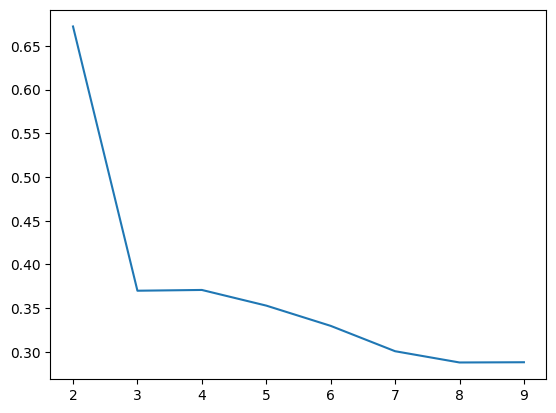

In [8]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

scores = pd.Series(dtype="float64")

X = df_numeric.drop(columns=["stroke"])
y = df_numeric["stroke"]

for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(X)
    scores.loc[n] = silhouette_score(X, kmeans.labels_)

scores.plot()

In [10]:
n=2
kmeans = KMeans(n_clusters=n, n_init=10)
kmeans.fit(X)
X["cluster"] = kmeans.labels_
(X["cluster"] == y).value_counts(normalize=True)

True     0.824577
False    0.175423
dtype: float64